In [ ]:
#import package
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [ ]:
# Mengambil data stock dari NASDAQ ticker symbol for Apple Inc. American Association of Professional Landmen (AAPL)
data = web.DataReader('AAPL', data_source='yahoo', start='1-1-2012', end='3-4-2022')['Adj Close']

In [ ]:
data.head()

Date
2012-01-03    12.575918
2012-01-04    12.643503
2012-01-05    12.783871
2012-01-06    12.917511
2012-01-09    12.897019
Name: Adj Close, dtype: float64

In [ ]:
data.tail()

Date
2022-02-28    165.119995
2022-03-01    163.199997
2022-03-02    166.559998
2022-03-03    166.229996
2022-03-04    163.169998
Name: Adj Close, dtype: float64

In [ ]:
log_return = np.log   (1 + data.pct_change())

In [ ]:
log_return.head()

Date
2012-01-03         NaN
2012-01-04    0.005360
2012-01-05    0.011041
2012-01-06    0.010400
2012-01-09   -0.001588
Name: Adj Close, dtype: float64

                                Today Price = Yesterday Price *e^r
                                r = drift + vol * z
                                drift = mean - 0.5 * var

In [ ]:
mean = log_return.mean()

In [ ]:
mean

0.0010015665728240557

In [ ]:
var = log_return.var()

In [ ]:
var

0.00032008622100784817

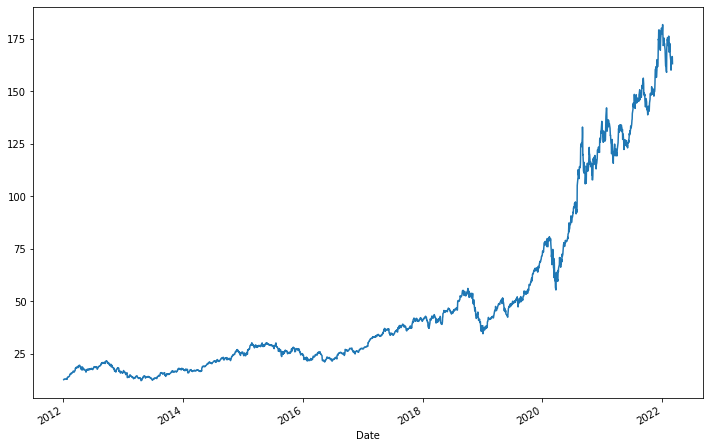

In [ ]:
data.plot(figsize=(12,8));

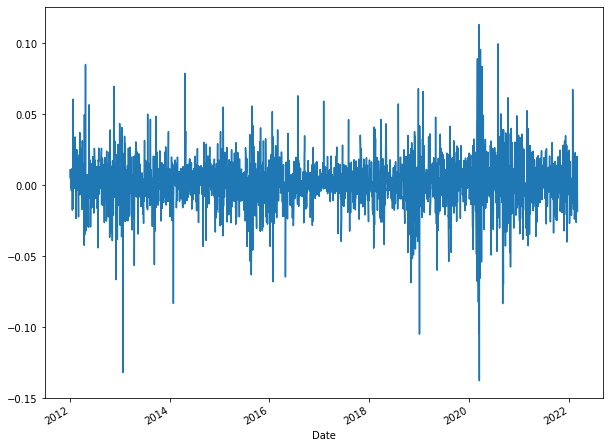

In [ ]:
log_return.plot(figsize=(10,8));

In [ ]:
drift = mean - 0.5 * var

In [ ]:
drift

0.0008415234623201317

In [ ]:
x = np.random.rand(10,2)

In [ ]:
x

array([[0.73556185, 0.13913614],
       [0.53751985, 0.65199314],
       [0.42142736, 0.97167099],
       [0.39902143, 0.83777784],
       [0.76646628, 0.97501592],
       [0.52658064, 0.76645655],
       [0.59011091, 0.810106  ],
       [0.83119388, 0.59612021],
       [0.04208257, 0.14366047],
       [0.74245838, 0.6843983 ]])

In [ ]:
norm.ppf(np.random.rand(10,2))

array([[ 0.13584744, -0.46458027],
       [-0.31736776,  0.69689049],
       [-0.69076794, -0.57815949],
       [ 1.40567269,  0.64030614],
       [ 0.15470532, -0.3235714 ],
       [ 1.26137315, -0.69517571],
       [ 1.30927954,  0.582801  ],
       [ 1.99088856,  0.68815451],
       [-0.74055727, -0.11204489],
       [ 0.17417649,  1.79602751]])

In [ ]:
vol = log_return.std()

In [ ]:
t_intervals = 1000
iterations = 10

In [ ]:
r = np.exp(drift + vol * norm.ppf(np.random.rand(t_intervals,iterations)))

In [ ]:
r

array([[0.97697852, 1.03006523, 0.99782568, ..., 1.0129357 , 0.95827749,
        1.01571409],
       [0.99374424, 1.00125168, 1.01665773, ..., 0.99513415, 0.97647085,
        1.00108227],
       [1.00954162, 0.99726512, 1.02926681, ..., 0.99276316, 1.00796544,
        1.01771444],
       ...,
       [0.97376409, 1.01019661, 1.03559859, ..., 1.03579611, 0.99143919,
        0.99551027],
       [0.99897042, 0.99397944, 0.98878661, ..., 0.99427614, 0.9736777 ,
        0.98949838],
       [1.00104217, 1.00494734, 0.98576522, ..., 0.97896   , 1.01191055,
        0.97900653]])

                                St = S0 * daily_return_t
                                St+1 = St * daily_return_t

In [ ]:
S0 = data.iloc[-1]

In [ ]:
S0

163.1699981689453

In [ ]:
price_list = np.zeros_like(r)

In [ ]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
price_list[0] = S0

In [ ]:
price_list

array([[163.16999817, 163.16999817, 163.16999817, ..., 163.16999817,
        163.16999817, 163.16999817],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [ ]:
for i in range(1, t_intervals):
    price_list[i] = price_list[i-1] * r[i]

In [ ]:
price_list

array([[163.16999817, 163.16999817, 163.16999817, ..., 163.16999817,
        163.16999817, 163.16999817],
       [162.14924641, 163.37423516, 165.88804002, ..., 162.37603764,
        159.33074716, 163.34659215],
       [163.69641216, 162.92742646, 170.74305345, ..., 161.20094834,
        160.59988713, 166.2401854 ],
       ...,
       [391.69032364, 981.70756116, 977.06420863, ..., 397.42727494,
        644.14872128, 434.45620778],
       [391.28704812, 975.79712927, 966.10800592, ..., 395.15245724,
        627.19324633, 429.89371542],
       [391.6948357 , 980.62473079, 952.35566968, ..., 386.8384495 ,
        634.66346241, 420.8687545 ]])

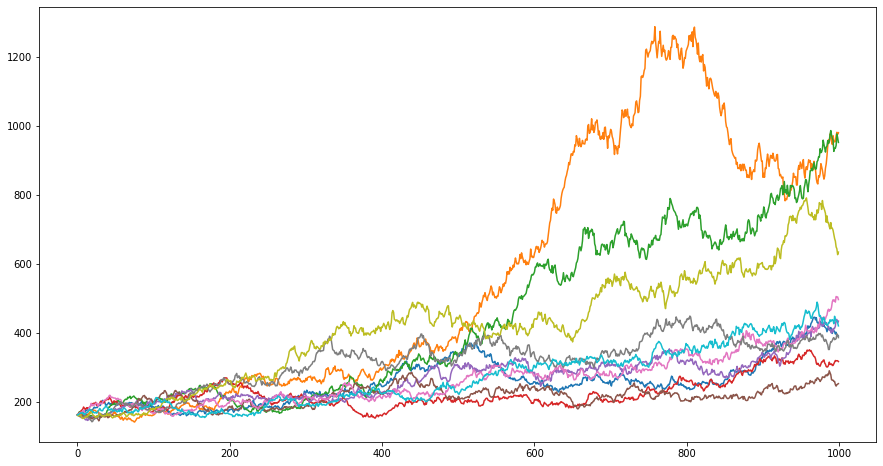

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(price_list);

In [ ]:
price_list.min()

142.26759491814127

In [ ]:
price_list.max()

1287.6871113729137